Notebook to plot feature maps from trained CNNs

In [32]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from aisi_joints.img_cls import JointsSequence

In [17]:
dataset_csv = '../final_models/dataset/dataset_split.csv'
model_dir = '../final_models/resnet/temp_scaled_model'

BLOCK_A_END = 274
BLOCK_B_END = 617
BLOCK_C_END = 777

In [18]:
dataset = JointsSequence(dataset_csv, 'test', random_crop=False, augment_data=False)
model = tf.keras.models.load_model(model_dir)

model.summary(expand_nested=True)
resnet_model = model.layers[3]

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 tf.math.truediv_1 (TFOpLamb  (None, 299, 299, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_1 (TFOpLam  (None, 299, 299, 3)      0         
 bda)                                                            
                                                                 
 model (Functional)          (None, 2)                 55912674  
|¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯|
| input_1 (InputLayer)      [(None, 299, 299, 3)]     0         |
|                                                               |
| conv2d (Conv2D)           (None, 149, 149, 32)      864  

In [59]:
index = [i for i, layer in enumerate(model.layers[-3].layers) if layer.name == 'conv2d_4']
index

[14]

In [72]:
# output of stem block last conv layer, before BN, activation and pooling
conv_model = tf.keras.Model(model.input, resnet_model.layers[15].output)

In [94]:
idx = 4
batch = dataset[0][0]
image = batch[idx]

feature_maps = conv_model(batch)

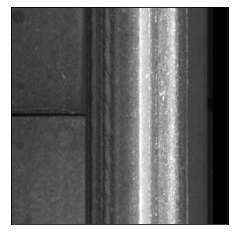

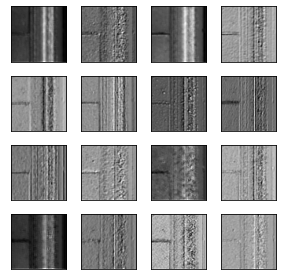

In [95]:
plt.imshow(image / 255)
plt.xticks([])
plt.yticks([])
plt.show()

square = 4
ix = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = plt.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(feature_maps[idx, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
plt.tight_layout()
plt.subplots_adjust(wspace=-.65, hspace=.25)
plt.show()